In [1]:
from tensorflow.keras.models import load_model

lanet5_model = load_model('custom_model.keras')

In [22]:
# import cv2
# import numpy as np

# def preprocess_image(image_path):
#     image = cv2.imread(image_path)

#     if len(image.shape) == 3:
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#     if np.mean(image) > 127:  # 127 is the midpoint for 8-bit grayscale
#         image = cv2.bitwise_not(image)
    
#     # Resize to 28x28 pixels
#     image = cv2.resize(image, (28, 28))
    
#     # Normalize to [0, 1]
#     image = image.astype('float32') / 255
#     image = image.reshape(1, 28, 28, 1)  # Reshape to match model input
    
#     return image

# # Example usage
# user_image = preprocess_image('1.png')
# prediction = lanet5_model.predict(user_image)
# predicted_label = np.argmax(prediction)
# print(f"Predicted Label: {predicted_label}")

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

lanet5_model = load_model('custom_model.keras')

def preprocess_image(image_path):
    try:

        image = cv2.imread(image_path)
        if image is None:
            raise ValueError("Image not found or unable to read.")

        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        resized_image = cv2.resize(gray_image, (128, 128))

        normalized_image = resized_image.astype('float32') / 255

        input_image = normalized_image.reshape(1, 128, 128, 1)

        return image, input_image
    except Exception as e:
        print(f"Error in preprocessing: {e}")
        return None, None

def predict_and_display(image_path):

    original_image, processed_image = preprocess_image(image_path)

    if processed_image is not None:

        prediction = lanet5_model.predict(processed_image)
        predicted_label = np.argmax(prediction)
        confidence = prediction[0][predicted_label] * 100

        height, width = original_image.shape[:2]
        cv2.rectangle(original_image, (10, 10), (width - 10, height - 10), (0, 255, 0), 3)

        text = f"Predicted: {predicted_label}, Confidence: {confidence:.2f}%"
        cv2.putText(original_image, text, (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

        plt.imshow(original_image_rgb)
        plt.axis('off')
        plt.title(text)
        plt.show()
    else:
        print("Image preprocessing failed.")

predict_and_display('keras.png')
def predict_and_display(image_path, true_label):

    original_image, processed_image = preprocess_image(image_path)

    if processed_image is not None:

        prediction = lanet5_model.predict(processed_image)
        predicted_label = np.argmax(prediction)
        confidence = prediction[0][predicted_label] * 100

        height, width = original_image.shape[:2]
        cv2.rectangle(original_image, (10, 10), (width - 10, height - 10), (0, 255, 0), 3)

        text = f"Predicted: {predicted_label}, Confidence: {confidence:.2f}%"
        cv2.putText(original_image, text, (20, 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
        plt.imshow(original_image_rgb)
        plt.axis('off')
        plt.title(text)
        plt.show()

        y_true = [true_label]  
        y_pred = [predicted_label]  
        f1 = f1_score(y_true, y_pred, average='weighted')
        print(f"F1 Score: {f1:.2f}")
    else:
        print("Image preprocessing failed.")

Error in preprocessing: Image not found or unable to read.
Image preprocessing failed.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


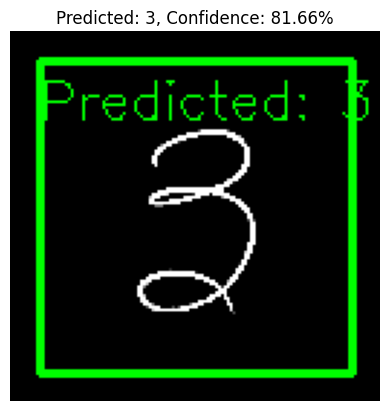

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from tensorflow.keras.models import load_model

lanet5_model = load_model('custom_model.keras')

def preprocess_image(image_path):
    try:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            raise ValueError("Image not found or unable to read.")

        normalized_image = image.astype('float32') / 255

        input_image = np.expand_dims(normalized_image, axis=(0, -1)).astype('float32')

        return image, input_image
    except Exception as e:
        print(f"Error in preprocessing: {e}")
        return None, None

def predict_and_display(image_path, true_label):
    original_image, processed_image = preprocess_image(image_path)

    if processed_image is not None:
        prediction = lanet5_model.predict(processed_image)
        predicted_label = np.argmax(prediction)
        confidence = prediction[0][predicted_label] * 100

        color_image = cv2.cvtColor(original_image, cv2.COLOR_GRAY2BGR)

        height, width = color_image.shape[:2]
        cv2.rectangle(color_image, (10, 10), (width - 10, height - 10), (0, 255, 0), 2)

        text = f"Predicted: {predicted_label}, Confidence: {confidence:.2f}%"
        cv2.putText(color_image, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 1)

        plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(text)
        plt.show()

    else:
        print("Image preprocessing failed.")
predict_and_display('stree/0_3.png', true_label=1)

In [8]:
import cv2
import numpy as np

def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert to grayscale to match model input requirements
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize to match the model's expected input size
    image = cv2.resize(image, (128, 128))

    # Normalize the pixel values to [0, 1]
    image = image.astype('float32') / 255

    # Add channel dimension for grayscale image
    image = image.reshape(1, 128, 128, 1)

    return image

# Example usage
user_image = preprocess_image('Final/0_1.png')
prediction = lanet5_model.predict(user_image)
predicted_label = np.argmax(prediction)
print(f"Predicted Label: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Label: 2


In [15]:
import cv2
import numpy as np

def preprocess_images(image_paths):
    processed_images = []

    for image_path in image_paths:

        image = cv2.imread(image_path)

        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        image = cv2.resize(image, (128, 128))

        image = image.astype('float32') / 255

        image = image.reshape(128, 128, 1)

        processed_images.append(image)
    return np.array(processed_images)
image_paths = ['Final/0_1.png', 'Final/0_10.png', 'Final/0_4.png', "Final/0_7.png"]
user_images = preprocess_images(image_paths)
predictions = lanet5_model.predict(user_images)
predicted_labels = np.argmax(predictions, axis=1)
print(f"Predicted Labels: {predicted_labels}")

confidence = prediction[0][predicted_label] * 100

print(f"The accuracy of the model is : {confidence:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted Labels: [2 6 5 9]
The accuracy of the model is : 99.94%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


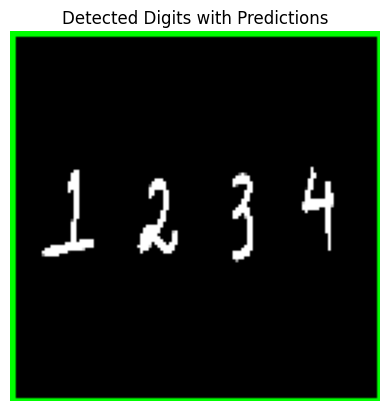

Predictions (Digit, Confidence):
Digit: 0, Confidence: 99.95%


In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the pre-trained model
lanet5_model = load_model('custom_model.keras')

def preprocess_single_image(image):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Resize the extracted digit to 128x128
    resized_image = cv2.resize(gray_image, (128, 128), interpolation=cv2.INTER_AREA)
    
    # Normalize and reshape the image
    normalized_image = resized_image.astype('float32') / 255.0
    input_image = normalized_image.reshape(1, 128, 128, 1)  # Model input format
    return input_image

def detect_and_predict_digits(image_path):
    try:
        # Load the original image
        original_image = cv2.imread(image_path)
        if original_image is None:
            raise ValueError("Image not found or unable to read.")
        
        # Convert the image to grayscale and threshold it
        gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
        _, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY_INV)
        
        # Find contours for detecting individual digits
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Convert the original image to color for visualization
        color_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)

        predictions = []  # To store predictions and confidence scores

        for contour in contours:
            # Get bounding box for each contour
            x, y, w, h = cv2.boundingRect(contour)
            
            # Ensure the detected region is large enough
            if w > 20 and h > 20:
                # Extract the digit region
                digit_region = original_image[y:y+h, x:x+w]
                
                # Preprocess the extracted region
                input_image = preprocess_single_image(digit_region)
                
                # Predict the digit
                prediction = lanet5_model.predict(input_image)
                predicted_label = np.argmax(prediction)
                confidence = prediction[0][predicted_label] * 100
                
                # Save prediction info
                predictions.append((predicted_label, confidence))
                
                # Draw bounding box and label on the image
                cv2.rectangle(color_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
                label_text = f"{predicted_label} ({confidence:.1f}%)"
                cv2.putText(color_image, label_text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 1)

        # Display the final image with predictions
        plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title("Detected Digits with Predictions")
        plt.show()

        # Print predictions in the console
        print("Predictions (Digit, Confidence):")
        for digit, conf in predictions:
            print(f"Digit: {digit}, Confidence: {conf:.2f}%")

    except Exception as e:
        print(f"Error: {e}")

# Path to your image containing multiple digits
detect_and_predict_digits('123.png')


In [36]:
print(lanet5_model.input_shape)


(None, 128, 128, 1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


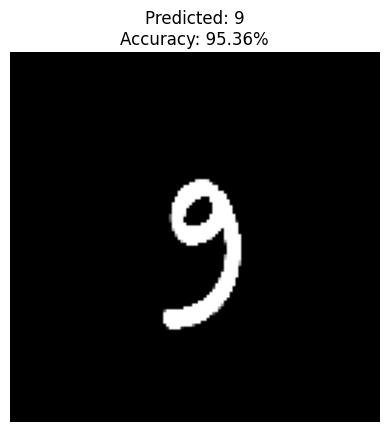

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


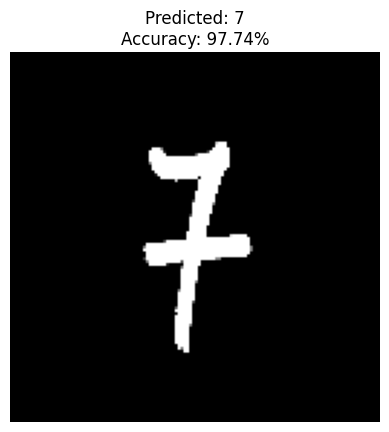

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


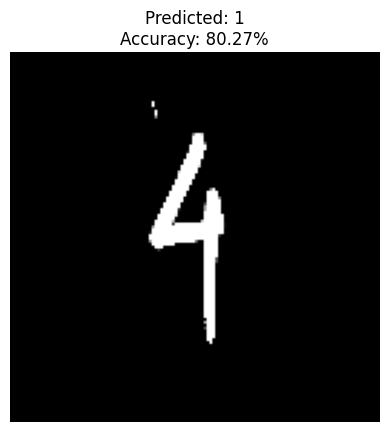

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


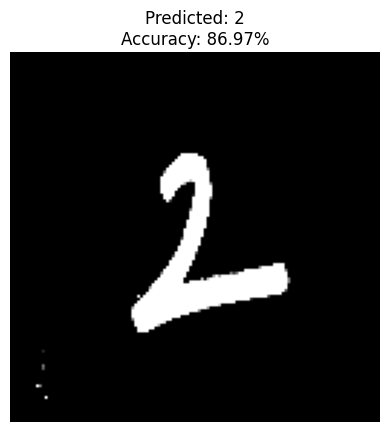

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


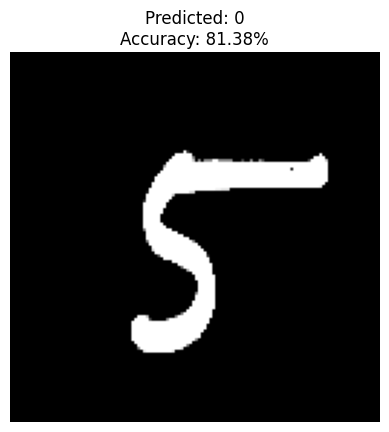

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


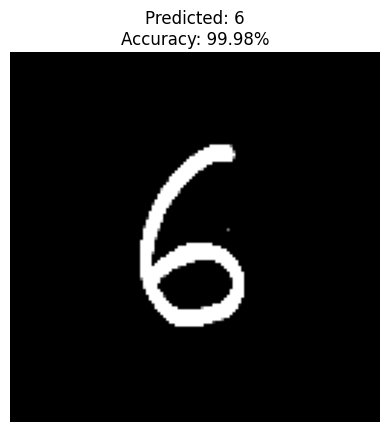

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


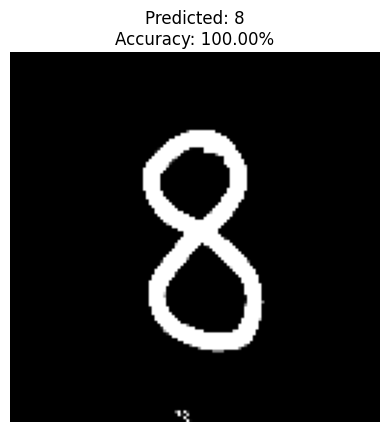

In [11]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    """
    Preprocesses an image to match the input requirements of the model.
    - Converts to grayscale.
    - Resizes to 128x128.
    - Normalizes pixel values to [0, 1].
    - Adds channel dimension for grayscale input.
    """
    # Read the image
    image = cv2.imread(image_path)

    # Convert to grayscale to match model input requirements
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize to match the model's expected input size
    image = cv2.resize(image, (128, 128))

    # Normalize the pixel values to [0, 1]
    image = image.astype('float32') / 255

    # Add channel dimension for grayscale image
    image = image.reshape(1, 128, 128, 1)

    return image

# Define input folder containing the images
input_folder = 'home'

# Loop through all images in the folder
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(input_folder, filename)
        
        # Preprocess the image
        user_image = preprocess_image(image_path)

        # Make prediction using the model
        prediction = lanet5_model.predict(user_image)  # Model outputs probabilities
        predicted_label = np.argmax(prediction)  # Get the label with the highest probability
        confidence = np.max(prediction) * 100  # Get the confidence as a percentage

        # Display the image with prediction and confidence
        original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        plt.imshow(original_image, cmap='gray')
        plt.title(f"Predicted: {predicted_label}\nAccuracy: {confidence:.2f}%")
        plt.axis('off')
        plt.show()
